- 불용어
- 워드클라우드
- ngram
- 한글자 단어 빼기

In [1]:
import fitz
from pykospacing import 

from konlpy.tag import Okt, Kkma, Hannanum
from wordcloud import WordCloud
from nltk import Text
from ckonlpy.tag import Twitter, Postprocessor
import re
from PIL import Image, ImageDraw, ImageFont
from mpl_toolkits.mplot3d import Axes3D
import random
import plotly.graph_objects as go
import numpy as np

# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

# 라이브러리를 로드합니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트를 설정합니다.
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)


In [105]:
path = './장미와 찔레.pdf'
doc = fitz.open(path)
spacing = Spacing()
okt = Okt()
twitter = Twitter()

/opt/anaconda3/lib/python3.12/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


PDF to TEXT

In [106]:
doc_text = ""
for page in doc:
    text = page.get_text()
    text = spacing(text)
    doc_text+=text

In [107]:
print(doc_text)

이 책은 종이책 <장미와 찔레>의 온라인판입니다. 보다 많은 독자들에게 읽혀졌으면 하는 바람으로 책의 모든 내 용을 온라인으로 공개하게 되었습니다. 또한 책 말미에 종이책 에 없는 이야기도 조금 넣었습니다. 이 파일은 누구든지 무료로 보실 수 있고 주변 분들과 자유롭게 나누실 수도 있습니다. 영리 목적이 아니라면 어떤 분이든 이파 일을 자유롭게 복제, 배포, 이용하실 수 있습니다. 많은 분들에게, 특히 멋진 꿈과 미래를 위해 노력하시는 여 러 젊 은 이들에게 이 부족한 책이 조금이나마 도움이 된다면 큰 영광 이고 기쁨이겠습니다. 여러분만의 크고 아름다운 장미꽃 인생을 이루시길 기도합니다. 저자 조동성 䤎 김성민 올림 글. 조동성 서울대 경영대학 교수 서울대상과대학 경영학과 졸업/ 하버드 경영대학원 박사 하버드, 듀크대, 동경대 등 13개 외국 대학 초빙교수 역 임 한국학술단체총연합회, 한국경영학회 등 20여개 학술단체 회장 역 임 유복한 가정에서 태어나 부족함 없는 어 린시절을 보냈으나, 유학을 앞두고 집안이 무너져 혈혈단신 맨손으로 비행기에 올랐다. 태권도 사범, 음식점 기도, 눈길 청소, 병원 잡역 등 다양한 일을 하며 학비와 생활비를 벌었고, 졸업 후 걸프오일과 보스톤 컨설팅그룹을 거쳐 1978년에 서울대 교수 발령을 받고 귀국했다. 경영전략, 국제경영학, 국가경쟁력, 디자인 경영, 혁신 경영, 창조경영, 윤리경영, 지속 경영, 메커니즘 경영, 경영예술 등 늘 새로운 분 야를 개척-선도하며 기업과 산업, 국가의 경쟁력 강화를 돕고 있다. 산업자원부 산업발전심의회 의장, 대 중소기업 상생협력위원회 위원장, 정부혁신관리위원회 위원장 등으로 정부 자문 역할을 했다. ‘세월은 우리의 주름살을 늘게 하지만 마음속 열정까지 시들게 하진 못한다’라는 사무엘 울만의 싯구를 좋아하는 ‘이순(耳順) 청춘’의 ‘젊은’ 학자이다. 이야기. 김성민(주)아이웰 콘텐츠 대표 서울대 경영학과 졸업/ 헬싱키 경제대 Ex ecutive MBA 재학 사업가의 꿈을 안고 경영학과에 진학 하

불용어 및 N-gram

In [246]:
stopwords = [
    '의',
    '이',
    '책',
    '은',
    ',',
    '.',
    '<',
    '>',
    '는',
    '가',
    '에',
    '일',
    '을',
    '들',
    '히',
    '도',
    '하',
    '용',
    '에게',
    '하는',
    '으로',
    '또한',
    '분',
    '해',
    '저',
    '간',
    '문',
    '개',
    '게',
    '이후',
    '중',"아", "휴", "아이구", "아이쿠", "아이고", "어", "나", "우리", "저희", "따라", "의해", "을", "를", "에", "의", "가", "으로", "로", 
    "에게", "뿐이다", "의거하여", "근거하여", "입각하여", "기준으로", "예하면", "예를 들면", "예를 들자면", "저", "소인", "소생", 
    "저희", "지말고", "하지마", "하지마라", "다른", "물론", "또한", "그리고", "비길수 없다", "해서는 안된다", "뿐만 아니라", 
    "만이 아니다", "만은 아니다", "막론하고", "관계없이", "그치지 않다", "그러나", "그런데", "하지만", "든간에", "논하지 않다", 
    "따지지 않다", "설사", "비록", "더라도", "아니면", "만 못하다", "하는 편이 낫다", "불문하고", "향하여", "향해서", "향하다", 
    "쪽으로", "틈타", "이용하여", "타다", "오르다", "제외하고", "이 외에", "이 밖에", "하여야", "비로소", "한다면 몰라도", "외에도", 
    "이곳", "여기", "부터", "기점으로", "따라서", "할 생각이다", "하려고하다", "이리하여", "그리하여", "그렇게 함으로써", "하지만", 
    "일때", "할때", "앞에서", "중에서", "보는데서", "으로써", "로써", "까지", "해야한다", "일것이다", "반드시", "할줄알다", "할수있다", 
    "할수있어", "임에 틀림없다", "한다면", "등", "등등", "제", "겨우", "단지", "다만", "할뿐", "딩동", "댕그", "대해서", "대하여", 
    "대하면", "훨씬", "얼마나", "얼마만큼", "얼마큼", "남짓", "여", "얼마간", "약간", "다소", "좀", "조금", "다수", "몇", "얼마", 
    "지만", "하물며", "또한", "그러나", "그렇지만", "하지만", "이외에도", "대해 말하자면", "뿐이다", "다음에", "반대로", "반대로 말하자면", 
    "이와 반대로", "바꾸어서 말하면", "바꾸어서 한다면", "만약", "그렇지않으면", "까악", "툭", "딱", "삐걱거리다", "보드득", "비걱거리다", 
    "꽈당", "응당", "해야한다", "에 가서", "각", "각각", "여러분", "각종", "각자", "제각기", "하도록하다", "와", "과", "그러므로", 
    "그래서", "고로", "한 까닭에", "하기 때문에", "거니와", "이지만", "대하여", "관하여", "관한", "과연", "실로", "아니나다를가", 
    "생각한대로", "진짜로", "한적이있다", "하곤하였다", "하", "하하", "허허", "아하", "거바", "와", "오", "왜", "어째서", "무엇때문에", 
    "어찌", "하겠는가", "무슨", "어디", "어느곳", "더군다나", "하물며", "더욱이는", "어느때", "언제", "야", "이봐", "어이", "여보시오", 
    "흐흐", "흥", "휴", "헉헉", "헐떡헐떡", "영차", "여차", "어기여차", "끙끙", "아야", "앗", "아야", "콸콸", "졸졸", "좍좍", 
    "뚝뚝", "주룩주룩", "솨", "우르르", "그래도", "또", "그리고", "바꾸어말하면", "바꾸어말하자면", "혹은", "혹시", "답다", "및", 
    "그에 따르는", "때가 되어", "즉", "지든지", "설령", "가령", "하더라도", "할지라도", "일지라도", "지든지", "몇", "거의", 
    "하마터면", "인젠", "이젠", "된바에야", "된이상", "만큼", "어찌됏든", "그위에", "게다가", "점에서 보아", "비추어 보아", "고려하면", 
    "하게될것이다", "일것이다", "비교적", "좀", "보다더", "비하면", "시키다", "하게하다", "할만하다", "의해서", "연이서", "이어서", 
    "잇따라", "뒤따라", "뒤이어", "결국", "의지하여", "기대여", "통하여", "자마자", "더욱더", "불구하고", "얼마든지", "마음대로", 
    "주저하지 않고", "곧", "즉시", "바로", "당장", "하자마자", "밖에 안된다", "하면된다", "그래", "그렇지", "요컨대", "다시 말하자면", 
    "바꿔 말하면", "즉", "구체적으로", "말하자면", "시작하여", "시초에", "이상", "허", "헉", "허걱", "바와같이", "해도좋다", "해도된다", 
    "게다가", "더구나", "하물며", "와르르", "팍", "퍽", "펄렁", "동안", "이래", "하고있었다", "이었다", "에서", "로부터", "까지", 
    "예하면", "했어요", "해요", "함께", "같이", "더불어", "마저", "마저도", "양자", "모두", "습니다", "가까스로", "하려고하다", 
    "즈음하여", "다른", "다른 방면으로", "해봐요", "습니까", "했어요", "말할것도 없고", "무릎쓰고", "개의치않고", "하는것만 못하다", 
    "하는것이 낫다", "매", "매번", "들", "모", "어느것", "어느", "로써", "갖고말하자면", "어디", "어느쪽", "어느것", "어느해", 
    "어느 년도", "라 해도", "언젠가", "어떤것", "어느것", "저기", "저쪽", "저것", "그때", "그럼", "그러면", "요만한걸", "그래", 
    "그때", "저것만큼", "그저", "이르기까지", "할 줄 안다", "할 힘이 있다", "너", "너희", "당신", "어찌", "설마", "차라리", 
    "할지언정", "할지라도", "할망정", "할지언정", "구토하다", "게우다", "토하다", "메쓰겁다", "옆사람", "퉤", "쳇", "의거하여", 
    "근거하여", "의해", "따라", "힘입어", "그", "다음", "버금", "두번째로", "기타", "첫번째로", "나머지는", "그중에서", "견지에서", 
    "형식으로 쓰여", "입장에서", "위해서", "단지", "의해되다", "하도록시키다", "뿐만아니라", "반대로", "전후", "전자", "앞의것", 
    "잠시", "잠깐", "하면서", "그렇지만", "다음에", "그러한즉", "그런즉", "남들", "아무거나", "어찌하든지", "같다", "비슷하다", 
    "예컨대", "이럴정도로", "어떻게", "만약", "만일", "위에서 서술한바와같이", "인 듯하다", "하지 않는다면", "만약에", "무엇", 
    "무슨", "어느", "어떤", "아래윗", "조차", "한데", "그럼에도 불구하고", "여전히", "심지어", "까지도", "조차도", "하지 않도록", 
    "않기 위하여", "때", "시각", "무렵", "시간", "동안", "어때", "어떠한", "하여금", "네", "예", "우선", "누구", "누가 알겠는가", 
    "아무도", "줄은모른다", "줄은 몰랏다", "하는 김에", "겸사겸사", "하는바", "그런 까닭에", "한 이유는", "그러니", "그러니까", 
    "때문에", "그", "너희", "그들", "너희들", "타인", "것", "것들", "너", "위하여", "공동으로", "동시에", "하기 위하여", "어찌하여", 
    "무엇때문에", "붕붕", "윙윙", "나", "우리", "엉엉", "휘익", "윙윙", "오호", "아하", "어쨋든", "만 못하다", "하기보다는", 
    "차라리", "하는 편이 낫다", "흐흐", "놀라다", "상대적으로 말하자면", "마치", "아니라면", "쉿", "그렇지 않으면", "그렇지 않다면", 
    "안 그러면", "아니었다면", "하든지", "아니면", "이라면", "좋아", "알았어", "하는것도", "그만이다", "어쩔수 없다", "하나", "일", 
    "일반적으로", "일단", "한켠으로는", "오자마자", "이렇게되면", "이와같다면", "전부", "한마디", "한항목", "근거로", "하기에", 
    "아울러", "하지 않도록", "않기 위해서", "이르기까지", "이 되다", "로 인하여", "까닭으로", "이유만으로", "이로 인하여", "그래서", 
    "이 때문에", "그러므로", "그런 까닭에", "알 수 있다", "결론을 낼 수 있다", "으로 인하여", "있다", "어떤것", "관계가 있다", 
    "관련이 있다", "연관되다", "어떤것들", "에 대해", "이리하여", "그리하여", "여부", "하기보다는", "하느니", "하면 할수록", "운운", 
    "이러이러하다", "하구나", "하도다", "다시말하면", "다음으로", "에 있다", "에 달려 있다", "우리", "우리들", "오히려", 
    "하기는한데", "어떻게", "어떻해", "어찌됏어", "어때", "어째서", "본대로", "자", "이", "이쪽", "여기", "이것", "이번", 
    "이렇게말하자면", "이런", "이러한", "이와 같은", "요만큼", "요만한 것", "얼마 안 되는 것", "이만큼", "이 정도의", "이렇게 많은 것", 
    "이와 같다", "이때", "이렇구나", "것과 같이", "끼익", "삐걱", "따위", "와 같은 사람들", "부류의 사람들", "왜냐하면", "중의하나", 
    "오직", "오로지", "에 한하다", "하기만 하면", "도착하다", "까지 미치다", "도달하다", "정도에 이르다", "할 지경이다", "결과에 이르다", 
    "관해서는", "여러분", "하고 있다", "한 후", "혼자", "자기", "자기집", "자신", "우에 종합한것과같이", "총적으로 보면", "총적으로 말하면", 
    "총적으로", "대로 하다", "으로서", "참", "그만이다", "할 따름이다", "쿵", "탕탕", "쾅쾅", "둥둥", "봐", "봐라", "아이야", 
    "아니", "와아", "응", "아이", "참나", "년", "월", "일", "령", "영", "일", "이", "삼", "사", "오", "육", "륙", "칠", "팔", "구", 
    "이천육", "이천칠", "이천팔", "이천구", "하나", "둘", "셋", "넷", "다섯", "여섯", "일곱", "여덟", "아홉", "령", "영"
]

ngram = [
    (('온라인','판'),'Noun'),
    (('장미','와','찔레'),'Noun'),
    (('조','동성'),'Noun'),
    (('취업','난'),'Noun'),
    (('지옥','과도'),'Noun'),
    (('합격자','명단'),'Noun'),
    (('취업','문'),'Noun'),
    (('마켓팅','부'),'Noun')
]

In [247]:
postprocessor = Postprocessor(twitter,stopwords=stopwords,ngrams=ngram)

In [248]:
text = postprocessor.pos(doc_text)

In [249]:
text

[('종이', 'Noun'),
 ('장미 - 와 - 찔레', 'Noun'),
 ('온라인 - 판', 'Noun'),
 ('입니다', 'Adjective'),
 ('보다', 'Josa'),
 ('많은', 'Adjective'),
 ('독자', 'Noun'),
 ('읽혀졌으면', 'Verb'),
 ('바람', 'Noun'),
 ('모든', 'Noun'),
 ('온라인', 'Noun'),
 ('공개', 'Noun'),
 ('하게', 'Verb'),
 ('되었습니다', 'Verb'),
 ('말미', 'Noun'),
 ('종이', 'Noun'),
 ('없는', 'Adjective'),
 ('이야기', 'Noun'),
 ('넣었습니다', 'Verb'),
 ('파일', 'Noun'),
 ('든지', 'Josa'),
 ('무료', 'Noun'),
 ('보실', 'Verb'),
 ('있고', 'Adjective'),
 ('주변', 'Noun'),
 ('자유', 'Noun'),
 ('롭', 'Noun'),
 ('나누실', 'Verb'),
 ('수도', 'Noun'),
 ('있습니다', 'Adjective'),
 ('영리', 'Noun'),
 ('목적', 'Noun'),
 ('라면', 'Noun'),
 ('이든', 'Josa'),
 ('파', 'Noun'),
 ('자유', 'Noun'),
 ('롭', 'Noun'),
 ('복제', 'Noun'),
 ('배포', 'Noun'),
 ('이용', 'Noun'),
 ('하실', 'Verb'),
 ('있습니다', 'Adjective'),
 ('많은', 'Adjective'),
 ('분들', 'Suffix'),
 ('특히', 'Adverb'),
 ('멋진', 'Adjective'),
 ('꿈', 'Noun'),
 ('미래', 'Noun'),
 ('위해', 'Noun'),
 ('노력', 'Noun'),
 ('하시는', 'Verb'),
 ('부족', 'Noun'),
 ('한', 'Josa'),
 ('이나마', 'Josa'),
 ('도움', 'N

In [250]:
book_word = []
for k in dict(text).keys():
    w = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', k)
    w = w.replace(" ","")
    book_word.append(w)

book_word

['종이',
 '장미와찔레',
 '온라인판',
 '입니다',
 '보다',
 '많은',
 '독자',
 '읽혀졌으면',
 '바람',
 '모든',
 '온라인',
 '공개',
 '하게',
 '되었습니다',
 '말미',
 '없는',
 '이야기',
 '넣었습니다',
 '파일',
 '든지',
 '무료',
 '보실',
 '있고',
 '주변',
 '자유',
 '롭',
 '나누실',
 '수도',
 '있습니다',
 '영리',
 '목적',
 '라면',
 '이든',
 '파',
 '복제',
 '배포',
 '이용',
 '하실',
 '분들',
 '특히',
 '멋진',
 '꿈',
 '미래',
 '위해',
 '노력',
 '하시는',
 '부족',
 '한',
 '이나마',
 '도움',
 '된다면',
 '영광',
 '이고',
 '기쁨',
 '겠습니다',
 '만의',
 '크고',
 '아름',
 '다운',
 '장미꽃',
 '인생',
 '이루',
 '시',
 '길',
 '기도',
 '합니다',
 '저자',
 '조동성',
 '김성민',
 '올림',
 '서울대',
 '경영',
 '대학',
 '교수',
 '상과대학',
 '경영학',
 '졸업',
 '하버드',
 '대학원',
 '박사',
 '듀크',
 '대',
 '동경대',
 '13',
 '외국',
 '초빙교수',
 '한국',
 '학술단체',
 '총',
 '연합',
 '회',
 '20',
 '여개',
 '회장',
 '유복',
 '가정',
 '태어나',
 '부족함',
 '린',
 '시절',
 '보냈으나',
 '유학',
 '앞두고',
 '집안',
 '무너져',
 '혈혈',
 '단신',
 '맨손',
 '비행기',
 '올랐다',
 '태권도',
 '사범',
 '음식점',
 '눈길',
 '청소',
 '병원',
 '잡역',
 '다양',
 '하며',
 '학비',
 '생활비',
 '벌었고',
 '걸프',
 '오일',
 '보스톤',
 '컨설팅',
 '그룹',
 '거쳐',
 '1978년',
 '발령',
 '받고',
 '귀국',
 '했다',
 '전략',
 '국제',
 '국가경쟁력'

In [251]:
# 명사 추출
word_list = ""
for s in book_word:
    word_list+=" "+s
okt_text = okt.nouns(word_list)

In [252]:
text_count = Text(okt_text,name='책')

In [253]:
text_count.vocab()

FreqDist({'취업': 3, '장미': 2, '찔레': 2, '온라인': 2, '판': 2, '이야기': 2, '동성': 2, '합격자': 2, '명단': 2, '선': 2, ...})

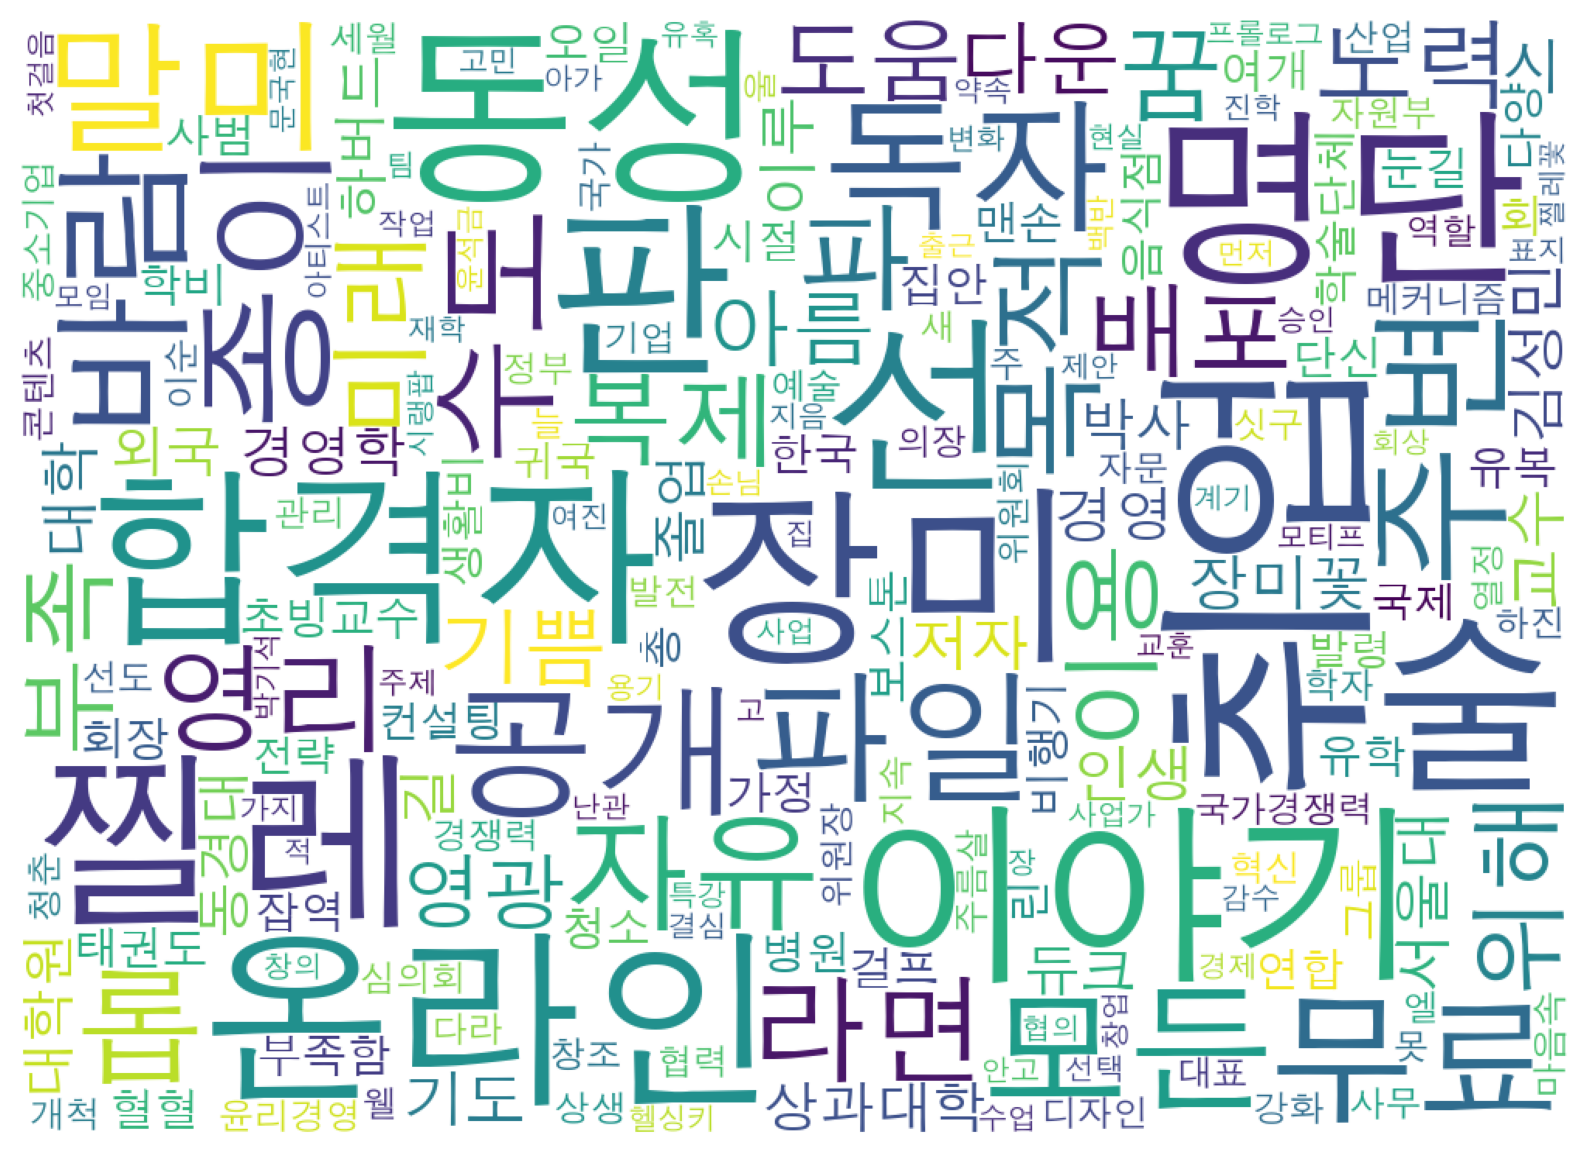

In [254]:
font_path='/Library/Fonts/AppleGothic.ttf'
wc = WordCloud(width=1000,height=720,background_color='white',font_path=font_path,min_word_length=2,max_font_size=150)
cloud = wc.generate_from_frequencies(text_count.vocab())

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

In [267]:
len(text_count.vocab())

3690

In [274]:
# 워드클라우드 이미지를 numpy 배열로 변환
wordcloud_image = wc.to_array()
words = wc.words_
# 3D 책 모양 생성 함수
def create_book_shape_points(width, height, depth, num_points=3690):
    # 책의 각 면에 대한 점 생성
    front_back = np.random.rand(num_points//3, 3)
    front_back[:, 0] *= width
    front_back[:, 1] *= height
    front = np.column_stack([front_back[:, 0], front_back[:, 1], np.zeros(num_points//3)])
    back = np.column_stack([front_back[:, 0], front_back[:, 1], np.full(num_points//3, depth)])
    
    spine = np.random.rand(num_points//3, 3)
    spine[:, 1] *= height
    spine[:, 2] *= depth
    
    top_bottom = np.random.rand(num_points//3, 3)
    top_bottom[:, 0] *= width
    top_bottom[:, 2] *= depth
    
    # 모든 점 합치기
    all_points = np.vstack([front, back, spine, top_bottom])
    
    return all_points

def words_to_3d_text(words, width, height, depth):
    x, y, z, size, text = [], [], [], [], []
    max_freq = max(words.values())
    for (word, freq) in words.items():
        x.append(np.random.uniform(0, width))
        y.append(np.random.uniform(0, height))
        z.append(np.random.uniform(0, depth))
        size.append(int(10 + (freq / max_freq) * 40))  # 10에서 50 사이의 정수 크기
        text.append(word)
    
    return go.Scatter3d(
        x=x, y=y, z=z,
        mode='text',
        text=text,
        textfont=dict(size=size, color='purple'),
        hoverinfo='text'
    )

# 책 모양 점들 생성
book_points = create_book_shape_points(800, 400, 100)

# 책 모양 점들로 Scatter3d 객체 생성
# book_scatter = go.Scatter3d(
#     x=book_points[:, 0],
#     y=book_points[:, 1],
#     z=book_points[:, 2],
#     mode='markers',
#     marker=dict(size=2, color='lightblue'),
#     hoverinfo='none'
# )

# 단어를 3D 텍스트로 표현
text_scatter = words_to_3d_text(words, 800, 400, 100)

# 그래프 생성
fig = go.Figure(data=[text_scatter])

# 레이아웃 설정
fig.update_layout(
    title='3D Book-shaped Word Cloud with Points and Text',
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_visible=False,
        yaxis_visible=False,
        zaxis_visible=False
    )
)

# 그래프 표시
fig.show()

In [285]:
# 3D 책 모양 생성 함수
def create_book_shape_points(width, height, depth, num_points=3690):
    # 책의 각 면에 대한 점 생성
    front_back = np.random.rand(num_points//3, 3)
    front_back[:, 0] *= width
    front_back[:, 1] *= height
    front = np.column_stack([front_back[:, 0], front_back[:, 1], np.zeros(num_points//3)])
    back = np.column_stack([front_back[:, 0], front_back[:, 1], np.full(num_points//3, depth)])
    
    spine = np.random.rand(num_points//3, 3)
    spine[:, 1] *= height
    spine[:, 2] *= depth
    
    top_bottom = np.random.rand(num_points//3, 3)
    top_bottom[:, 0] *= width
    top_bottom[:, 2] *= depth
    
    # 모든 점 합치기
    all_points = np.vstack([front, back, spine, top_bottom])
    
    return all_points

def words_to_3d_text_on_book(words, width, height, depth, curvature=0.1, min_distance=50):
    x, y, z, size, text = [], [], [], [], []
    max_freq = max(words.values())
    positions = []  # 이전 단어의 좌표를 저장

    for index, (word, freq) in enumerate(words.items()):
        while True:
            if index < len(words) // 2:
                x_pos = np.random.uniform(-width // 2, 0)
            else:
                x_pos = np.random.uniform(0, width // 2)
            z_pos = np.random.uniform(-depth // 4, depth // 4)
            y_pos = (height * (x_pos / (width // 2)) ** 2) * curvature

            # 각 단어의 크기를 빈도수에 따라 조정
            size_factor = int(10 + (freq / max_freq) * 40)

            # 충돌 검사: 다른 단어와의 최소 거리 체크
            too_close = False
            for prev_x, prev_y, prev_z in positions:
                if np.sqrt((x_pos - prev_x)**2 + (y_pos - prev_y)**2 + (z_pos - prev_z)**2) < min_distance:
                    too_close = True
                    break

            if not too_close:
                positions.append((x_pos, y_pos, z_pos))
                x.append(x_pos)
                y.append(y_pos)
                z.append(z_pos)
                size.append(size_factor)
                text.append(word)
                break

    return go.Scatter3d(
        x=x, y=y, z=z,
        mode='text',
        text=text,
        textfont=dict(size=size, color='purple'),
        hoverinfo='text'
    )

In [289]:
# 워드클라우드 이미지를 numpy 배열로 변환
wordcloud_image = wc.to_array()
words = wc.words_

# 책 모양 점들 생성
book_points = create_book_shape_points(800, 400, 100)

# 책 모양 점들로 Scatter3d 객체 생성
book_scatter = go.Scatter3d(
    x=book_points[:, 0],
    y=book_points[:, 1],
    z=book_points[:, 2],
    mode='markers',
    marker=dict(size=2, color='lightblue'),
    hoverinfo='none'
)

# 단어를 3D 책 모양으로 표현
text_scatter = words_to_3d_text_on_book(words, 800, 400, 100,curvature=60,min_distance=100)

# 그래프 생성
fig = go.Figure(data=[text_scatter])

# 레이아웃 설정
fig.update_layout(
    title='3D Slightly Open Book-shaped Word Cloud',
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_visible=False,
        yaxis_visible=False,
        zaxis_visible=False
    )
)

# 그래프 표시
fig.show()

In [3]:
path = './장미와 찔레.pdf'
pdf = fitz.open(path)
spacing = Spacing()
okt = Okt()
twitter = Twitter()

/opt/anaconda3/lib/python3.12/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [4]:
doc_text = ""
for page in pdf:
    text = spacing(page.get_text())
    doc_text+=text

In [5]:
print(doc_text)

이 책은 종이책 <장미와 찔레>의 온라인판입니다. 보다 많은 독자들에게 읽혀졌으면 하는 바람으로 책의 모든 내 용을 온라인으로 공개하게 되었습니다. 또한 책 말미에 종이책 에 없는 이야기도 조금 넣었습니다. 이 파일은 누구든지 무료로 보실 수 있고 주변 분들과 자유롭게 나누실 수도 있습니다. 영리 목적이 아니라면 어떤 분이든 이파 일을 자유롭게 복제, 배포, 이용하실 수 있습니다. 많은 분들에게, 특히 멋진 꿈과 미래를 위해 노력하시는 여 러 젊 은 이들에게 이 부족한 책이 조금이나마 도움이 된다면 큰 영광 이고 기쁨이겠습니다. 여러분만의 크고 아름다운 장미꽃 인생을 이루시길 기도합니다. 저자 조동성 䤎 김성민 올림 글. 조동성 서울대 경영대학 교수 서울대상과대학 경영학과 졸업/ 하버드 경영대학원 박사 하버드, 듀크대, 동경대 등 13개 외국 대학 초빙교수 역 임 한국학술단체총연합회, 한국경영학회 등 20여개 학술단체 회장 역 임 유복한 가정에서 태어나 부족함 없는 어 린시절을 보냈으나, 유학을 앞두고 집안이 무너져 혈혈단신 맨손으로 비행기에 올랐다. 태권도 사범, 음식점 기도, 눈길 청소, 병원 잡역 등 다양한 일을 하며 학비와 생활비를 벌었고, 졸업 후 걸프오일과 보스톤 컨설팅그룹을 거쳐 1978년에 서울대 교수 발령을 받고 귀국했다. 경영전략, 국제경영학, 국가경쟁력, 디자인 경영, 혁신 경영, 창조경영, 윤리경영, 지속 경영, 메커니즘 경영, 경영예술 등 늘 새로운 분 야를 개척-선도하며 기업과 산업, 국가의 경쟁력 강화를 돕고 있다. 산업자원부 산업발전심의회 의장, 대 중소기업 상생협력위원회 위원장, 정부혁신관리위원회 위원장 등으로 정부 자문 역할을 했다. ‘세월은 우리의 주름살을 늘게 하지만 마음속 열정까지 시들게 하진 못한다’라는 사무엘 울만의 싯구를 좋아하는 ‘이순(耳順) 청춘’의 ‘젊은’ 학자이다. 이야기. 김성민(주)아이웰 콘텐츠 대표 서울대 경영학과 졸업/ 헬싱키 경제대 Ex ecutive MBA 재학 사업가의 꿈을 안고 경영학과에 진학 하

In [6]:
tokenized_text = okt.nouns(doc_text[:10000])

In [9]:
text_count = Text(tokenized_text)